Found 20000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.
Found 25000 images belonging to 5 classes.
Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 533s 844ms/step - accuracy: 0.6043 - loss: 1.0553 - val_accuracy: 0.8826 - val_loss: 0.2966
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.5218
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 514ms/step - accuracy: 0.8852 - loss: 0.3193 - val_accuracy: 0.9529 - val_loss: 0.1430
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 114us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1992
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 323s 515ms/step - accuracy: 0.9411 - loss: 0.1710 - val_accuracy: 0.9481 - val_loss: 0.1540
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0118
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 323s 515ms/step - accu

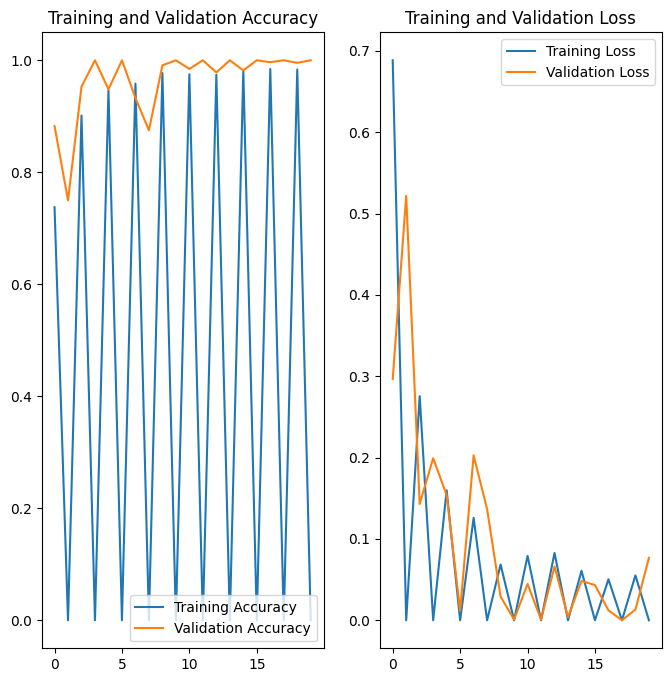

781/781 ━━━━━━━━━━━━━━━━━━━━ 322s 413ms/step - accuracy: 0.9981 - loss: 0.0077
Test accuracy: 1.00
Test loss: 0.01


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Define image dimensions
img_height, img_width = 150, 150
batch_size = 32

# Define directories
train_dir = 'Cervical Cancer'
validation_dir = 'Validation'
test_dir = 'Train'

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Using 20% of training data for validation
)

# Data normalization for validation and testing
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Flow validation images in batches using validation_datagen generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,  # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

# Flow test images in batches using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle test data
)

# Calculate steps per epoch
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size
test_steps = test_generator.samples // batch_size

# Define the CNN model using Input layer
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=20
)

# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_steps)
print(f'Test accuracy: {test_acc:.2f}')
print(f'Test loss: {test_loss:.2f}')
